In [23]:
import import_ipynb

ModuleNotFoundError: No module named 'import_ipynb'

In [4]:
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
from matplotlib import pyplot as plt

In [5]:
confirmed = np.array([
    37,
    158,
    228,
    388,
    488,
    525,
    752,
    898,
    1499,
    2044,
    2560,
    3089,
    3790,
    4279,
    5032,
    5597,
    6406,
    7281,
    8127,
    8886
])

In [6]:
x = np.arange(len(confirmed))
x = add_constant(x)

In [7]:

model = OLS(np.log(confirmed[:14]), x[:14])


In [8]:
result = model.fit()

In [9]:
result.summary()

C:\Users\Onkar Kadam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.59e-08
Time:                        13:09:46   Log-Likelihood:                -4.4793
No. Observations:                  14   AIC:                             12.96
Df Residuals:                      12   BIC:                             14.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6135      0.183     25.278      0.000       4.216       5.011
x1             0.3162      0.024     13.250      0.000       0.264       0.368
==============================================================================
Omnibus:                       16.980   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.682
Skew:                          -1.827   Prob(JB):                      0.00107
Kurtosis:                       6.179   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

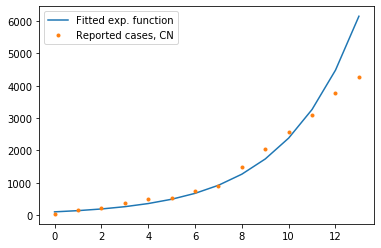

In [10]:
plt.plot(
    np.exp(result.predict(x[:14])),
    label="Fitted exp. function"      
)
plt.plot(confirmed[:14], ".", label="Reported cases, CN")
plt.legend()
plt.show()

In [11]:
world_population = 7763252653
days = 0
infected = confirmed[14]
while infected < world_population:
    days += 1
    infected = np.exp(result.predict([1, 13 + days]))[0]
print(f"Number of days until whole world is infected: {days}")

Number of days until whole world is infected: 45


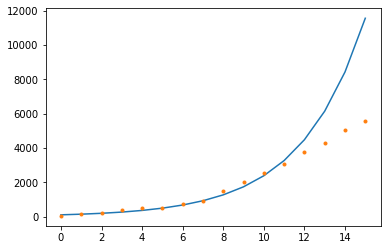

In [12]:
plt.plot(np.exp(result.predict(x[:16])))
plt.plot(confirmed[:16], ".")
plt.show()

In [13]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
logistic_function = lambda x, a, b, c, d: \
    a / (1 + np.exp(-c * (x - d))) + b

In [14]:
confirmed = np.array(confirmed)
x = x[:, 1]

In [15]:
(a_, b_, c_, d_), _ = curve_fit(logistic_function, x, confirmed)

C:\Users\Onkar Kadam\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


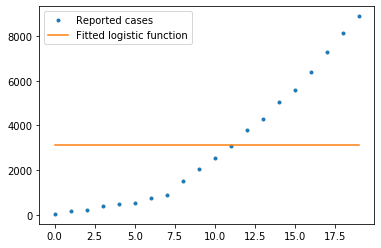

In [16]:
plt.plot(x, confirmed, ".", label="Reported cases")
confirmed_pred = logistic_function(x, a_, b_, c_, d_)
plt.plot(x, confirmed_pred, label="Fitted logistic function")
plt.legend()
plt.show()


In [17]:
r2_score(confirmed, confirmed_pred)

-2.220446049250313e-16

In [18]:
confirmed_now = confirmed[-1]
confirmed_then = confirmed[-2]
days = 0
now = x[-1]
while confirmed_now - confirmed_then > 5:
    days += 1
    confirmed_then = confirmed_now
    confirmed_now = logistic_function(
        now + days,
        a_,
        b_,
        c_,
        d_,
    )
print(f"In {days} days the number of infected people will plateau at {int(confirmed_now)}")

In 1 days the number of infected people will plateau at 3103


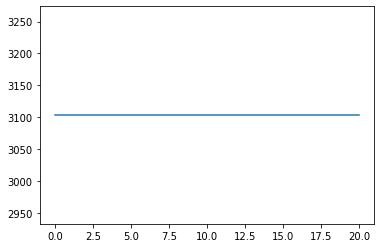

In [19]:

x_ = np.linspace(0, now + days)
plt.plot(
    x_,
    logistic_function(x_, a_, b_, c_, d_)
)
# plt.show()

NameError: name 'show_graph' is not defined

In [25]:
def show_graph():
    plt.show()
    